<a href="https://colab.research.google.com/github/Raghuram-Veeramallu/Astro_Stat_Proj3/blob/development/Project3_Group3_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AST/STAT 5731 Project 3

## Research Synopsis

**Group 3**   
Christopher Guo  
Daniel Warshofsky  
Hari Veeramallu  
Jacynda Alatoma  
Nicholas Kruegler  

### Research Question

Insert Research Question Here

### Preamble

Explain here what we did with the data and what considerations are needed

### Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# download the dataset to colab

!gdown 1nOktHZ4Qs8jKDr2GPzAje64YlsDZdysb

Downloading...
From: https://drive.google.com/uc?id=1nOktHZ4Qs8jKDr2GPzAje64YlsDZdysb
To: /content/SunspotDist.csv
100% 225k/225k [00:00<00:00, 3.87MB/s]


In [4]:
data = pd.read_csv("SunspotDist.csv")

In [5]:
data

,Year,Month,Day,Time in Thousandths of day,Greenwich sunspot group number,Mt. Wilson Magnetic Classification,Greenwich Group Type,Observed umbral area in millionths of solar disk,Observed whole spot area in millionths of solar disk,Corrected umbral area in millionths of solar hemisphere,Corrected whole spot area in millionths,Distance from center of solar disk in disk radii,Polar angle,Carrington Longitude,Latitude,Central meridian distance
0,1976,1,12,0.46,23680,0,7,1,19,1,12,0.596,261.1,34.1,-8.7,36.4
1,1976,1,13,0.421,23680,0,7,2,17,2,13,0.747,262.2,33.4,-8.7,48.4
2,1976,1,14,0.281,23680,0,7,2,12,2,12,0.863,263.4,33.4,-8.0,59.7
3,1976,1,12,0.46,23681,0,5,14,97,26,172,0.959,100.7,284.0,-11.4,-73.7
4,1976,1,13,0.421,23681,0,5,79,411,82,425,0.875,100.4,284.0,-11.2,-61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,1968,12,20,0.285,154204,0,0,0,3,0,5,0.918,59.2,136.8,27.3,-62.2
3385,1968,12,21,0.475,154205,0,0,1,17,5,43,0.980,286.8,260.7,16.1,77.4
3386,1968,12,22,0.513,154206,0,0,0,12,0,7,0.421,212.3,183.8,-22.6,14.1
3387,1968,12,26,0.572,154207,0,0,0,17,0,9,0.323,321.5,128.1,12.2,11.9


In [18]:
data.describe()

,Year,Month,Day,Greenwich sunspot group number,Mt. Wilson Magnetic Classification,Greenwich Group Type,Observed umbral area in millionths of solar disk,Observed whole spot area in millionths of solar disk,Corrected umbral area in millionths of solar hemisphere,Corrected whole spot area in millionths,Distance from center of solar disk in disk radii,Polar angle,Carrington Longitude,Latitude,Central meridian distance
count,3389.000000,3389.000000,3389.000000,3389.000000,3389.0,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000
mean,1969.005606,6.375922,15.872529,30555.838595,0.0,2.884332,36.800531,248.903216,27.996459,187.352316,0.645477,178.385099,161.383151,-0.261906,-0.342667
std,2.652486,3.360611,8.826628,32847.511201,0.0,2.799723,60.831330,417.971854,40.774895,280.386918,0.245082,97.891371,99.518933,17.932533,45.253175
min,1968.000000,1.000000,1.000000,21444.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.016000,0.000000,0.000000,-46.100000,-86.800000
25%,1968.000000,4.000000,8.000000,21579.000000,0.0,0.000000,4.000000,27.000000,3.000000,21.000000,0.448000,84.800000,84.600000,-15.500000,-37.000000
50%,1968.000000,6.000000,16.000000,21694.000000,0.0,2.000000,14.000000,87.000000,13.000000,83.000000,0.667000,172.900000,150.000000,4.500000,-1.200000
75%,1968.000000,9.000000,24.000000,21816.000000,0.0,5.000000,44.000000,287.000000,36.000000,231.000000,0.868000,272.300000,243.300000,15.500000,37.000000
max,1976.000000,12.000000,31.000000,164903.000000,0.0,9.000000,819.000000,5542.000000,449.000000,3202.000000,0.998000,359.600000,359.900000,41.400000,87.400000


In [36]:
area = data["Corrected whole spot area in millionths"]
data = data[area>60]
area = data["Corrected whole spot area in millionths"]

In [37]:
logarea = np.log10(area)

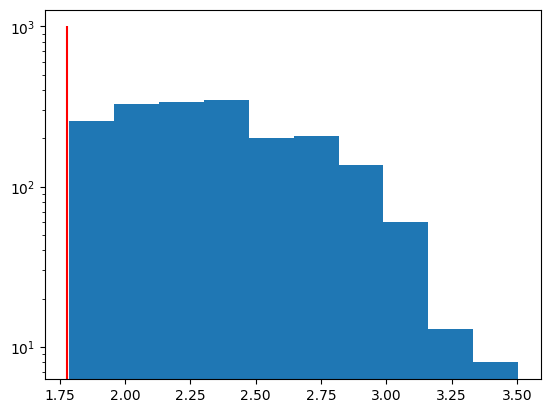

In [41]:
fig,ax = plt.subplots()
ax.hist(logarea)
ax.set_yscale("log")
ax.vlines(1.78,ymin=0,ymax=1000,colors="r")